# Spazzo il testo in frasi
Non mi interessa pulirle da caratteri strani, tanto devo solo cercare se vi compaiono i nomi dei personaggi

In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

C:\Users\Max\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Max\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
texts = []
for i in range(7):    
    with open(f"HP{i+1}.txt", encoding="utf8") as file:
        text = file.read()
    texts.append(sent_tokenize(text))
text = [token for book in texts for token in book]
text[0]

"\n1\nHarry Potter and the Sorcerer's Stone\nCHAPTER ONE\nTHE BOY WHO LIVED\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much."

# Definisco un dizionario di pseudonimi
Inserisco i principali personaggi ed associato ad ognuno di loro le stringe che li identificano nel testo.
Questo è fondamentale perché se usiamo i nomi ci sono ambiguità (ad esempio fratelli con lo stesso cognome), e perché alcuni personaggi hanno degli pseudonimi diversi dal nome (tu sai chi).

In [3]:
characters = {"Harry Potter" : ["harry"], "Ronald Weasley" : ["ron", "ronald"], 
              "Hermione Granger" : ["hermione", "granger"], "Rubeus Hagrid" : ["rubeus", "hagrid"],
              "Albus Dumbledore" : ["albus", "dumbledore"], "Draco Malfoy" : ["draco"],
              "Minerva McGonagall" : ["minerva", "mcgonagall"], "Severus Snape" : ["severus", "snape"],
              "Ginny Weasley" : ["ginny"], "Lucius Malfoy" : ["lucius"], "Vernon Dursley" : ["vernon"],
              "Petunia Dursley" : ["petunia"], "Dudley Dursley" : ["dudley"], "Arthur Weasley" : ["arthur"], 
              "Molly Weasley" : ["molly"], "Trelawney" : ["trelawney"],
              "Neville Longbottom" : ["neville"], "Fred Weasley" : ["fred"], 
              "George Weasley" : ["george"], "Lord Voldemort" : ["voldemort", "you-know-who", "you know who"], 
              "Argus Filch" : ["argus", "filch"], "Bill Weasley" : ["bill"], "Ollivander" : ["ollivander"],
              "Sprout" : ["sprout"], "Percy Weasley" : ["percy"], "Charlie Weasley" : ["charlie"],
              "Oliver Wood" : ["oliver", "wood"], "Seamus Finnigan" : ["seamus", "finnigan"],
              "Vincent Crabbe" : ["vincent", "crabbe"], "Gregory Goyle" : ["gregory", "goyle"], 
              "Marcus Flint" : ["marcus", "flint"], "James Potter" : ["james"], "Lily Evans" : ["lily", "evans"],
              "Rolanda Hooch" : ["rolanda", "hooch"], "Filius Flitwick" : ["filius", "flitwick"], "Quirrell" : ["quirrell"]}

# Creo la sociomatrice

In [4]:
import numpy as np
import itertools 

n = len(characters.keys())
textlength = len(text)
sociomatrix = np.zeros((n,n))
characters_array = np.array(list(characters.keys()))

for i, sentence in enumerate(text):
    characters_in_sentence = set()
    sentence = sentence.lower()
    for c, names in characters.items():
        for name in names:
            if name in sentence:
                characters_in_sentence.add(c)
    for subset in itertools.combinations(characters_in_sentence, 2):
        i = np.argwhere(subset[0] == characters_array)
        j = np.argwhere(subset[1] == characters_array)
        sociomatrix[i, j] += 1
        sociomatrix[j, i] += 1

In [13]:
import pandas as pd
sociomatrix_df = pd.DataFrame(sociomatrix, columns= characters_array, index=characters_array)
sociomatrix_df

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Lucius Malfoy,...,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.0,2617.0,1800.0,515.0,925.0,64.0,184.0,511.0,254.0,20.0,...,116.0,56.0,70.0,89.0,7.0,43.0,23.0,10.0,33.0,29.0
Ronald Weasley,2617.0,0.0,1742.0,224.0,206.0,20.0,75.0,170.0,189.0,6.0,...,42.0,35.0,44.0,49.0,1.0,8.0,6.0,4.0,22.0,7.0
Hermione Granger,1800.0,1742.0,0.0,190.0,125.0,13.0,47.0,94.0,139.0,5.0,...,20.0,10.0,18.0,23.0,0.0,1.0,2.0,0.0,10.0,4.0
Rubeus Hagrid,515.0,224.0,190.0,0.0,92.0,6.0,25.0,21.0,7.0,2.0,...,12.0,0.0,6.0,7.0,0.0,1.0,1.0,0.0,8.0,0.0
Albus Dumbledore,925.0,206.0,125.0,92.0,0.0,16.0,62.0,151.0,15.0,7.0,...,7.0,3.0,2.0,8.0,0.0,10.0,10.0,0.0,12.0,2.0
Draco Malfoy,64.0,20.0,13.0,6.0,16.0,0.0,1.0,23.0,2.0,7.0,...,1.0,0.0,8.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0
Minerva McGonagall,184.0,75.0,47.0,25.0,62.0,1.0,0.0,50.0,11.0,0.0,...,10.0,2.0,2.0,3.0,1.0,1.0,3.0,2.0,26.0,3.0
Severus Snape,511.0,170.0,94.0,21.0,151.0,23.0,50.0,0.0,7.0,6.0,...,3.0,7.0,5.0,12.0,0.0,30.0,20.0,0.0,13.0,10.0
Ginny Weasley,254.0,189.0,139.0,7.0,15.0,2.0,11.0,7.0,0.0,0.0,...,3.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0
Lucius Malfoy,20.0,6.0,5.0,2.0,7.0,7.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


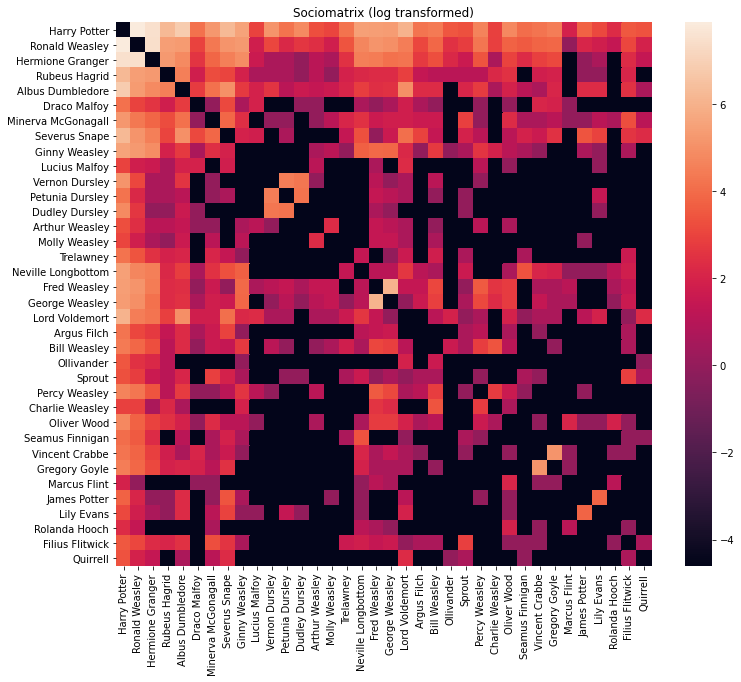

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))

sns.heatmap(np.log(sociomatrix_df + 0.01), annot=False)
plt.title("Sociomatrix (log transformed)")
plt.show()

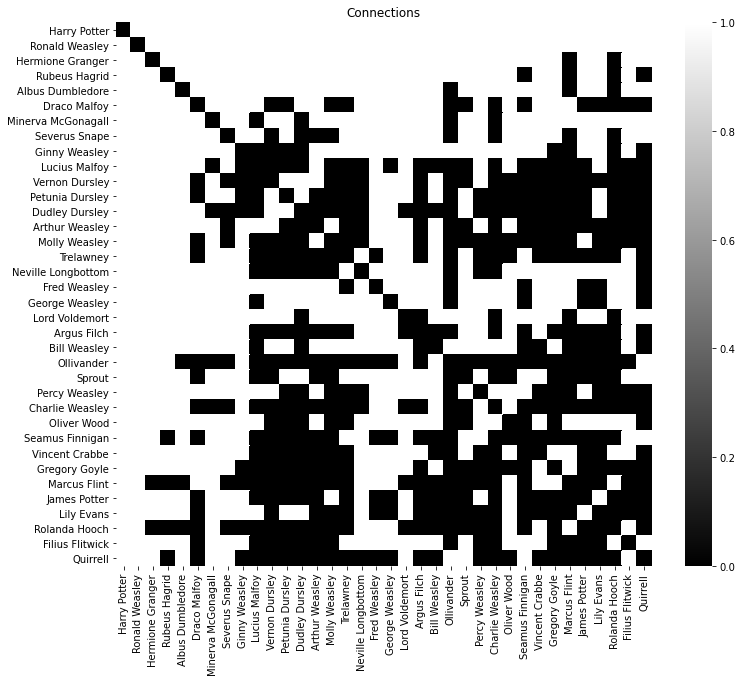

In [15]:
plt.figure(figsize=(12,10))

sns.heatmap(sociomatrix_df!=0, annot=False, cmap = "gray")
plt.title("Connections")
plt.show()

# Statistiche descrittive

In [50]:
import networkx as nx

G = nx.from_numpy_array(sociomatrix)


n = sociomatrix.shape[0]

grand_mean = np.sum(sociomatrix)/(n * (n-1)) # no diagonal
connections_density = np.sum(sociomatrix!=0)/(n * (n-1)) # no diagonal

# Sono uguali perchè la matrice è simmetrica
row_mean = np.mean(sociomatrix_df, axis=1)
col_mean = np.mean(sociomatrix_df, axis=0)

diameter = nx.diameter(G)
max_degree = np.max(sociomatrix)

print("------------------------------------------------------------------------------------------")
print(f"""
      There are {n} characters.
      *** Grand mean: {round(grand_mean,2)} interactions per couple.
      *** Edge density: {round(connections_density,2)}%
      *** Diameter: {diameter}
      *** Max degree: {int(max_degree)}
      """)
print("------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------

      There are 36 characters.
      *** Grand mean: 27.06 interactions per couple.
      *** Edge density: 0.59%
      *** Diameter: 2
      *** Max degree: 2617
      
------------------------------------------------------------------------------------------


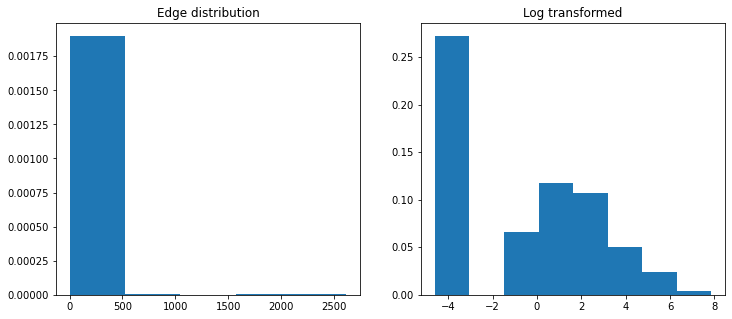

In [75]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

ax[0].hist(sociomatrix.reshape(-1), bins=5, density = True)
ax[0].set_title("Edge distribution")

ax[1].hist(np.log(sociomatrix.reshape(-1) + 0.01), bins=8, density = True)
ax[1].set_title("Log transformed")

plt.show()

In [41]:
pd.DataFrame({"Row_mean": row_mean, "Column_mean": col_mean}, index = characters_array).T # .T per non estendere troppo la pagina

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Lucius Malfoy,...,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Row_mean,257.083333,174.166667,129.472222,33.472222,53.333333,5.166667,16.111111,35.166667,23.138889,2.027778,...,8.027778,4.222222,9.583333,10.555556,0.805556,4.083333,3.472222,0.944444,4.861111,1.972222
Column_mean,257.083333,174.166667,129.472222,33.472222,53.333333,5.166667,16.111111,35.166667,23.138889,2.027778,...,8.027778,4.222222,9.583333,10.555556,0.805556,4.083333,3.472222,0.944444,4.861111,1.972222


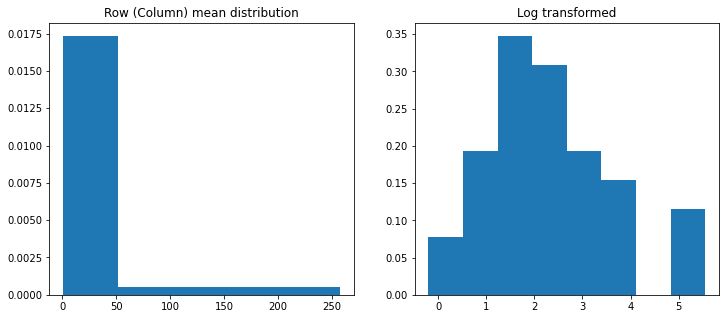

In [79]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

ax[0].hist(col_mean, bins=5, density = True)
ax[0].set_title("Row (Column) mean distribution")

ax[1].hist(np.log(col_mean + 0.01), bins=8, density = True)
ax[1].set_title("Log transformed")

plt.show()

# Misure di centralità

In [47]:
def get_df_centrality(centr):
    centr = dict([(characters_array[i],centr[i]) for i in range(len(centr))])
    sorted_cent = sorted(centr.items(), key=lambda item: item[1],reverse  = True)
    return pd.DataFrame([el[1]/sum(centr.values()) for el in sorted_cent],
                         columns = ['Centrality'],index = [el[0] for el in sorted_cent])
    

bet_centr = get_df_centrality(nx.betweenness_centrality(G)) # Bridgeness/importance 
deg_centr = get_df_centrality(nx.degree_centrality(G)) # Sociality
clo_centr = get_df_centrality(nx.closeness_centrality(G)) # Hubness/ ability to spread
prk_centr = get_df_centrality(nx.pagerank(G)) # Transitivity

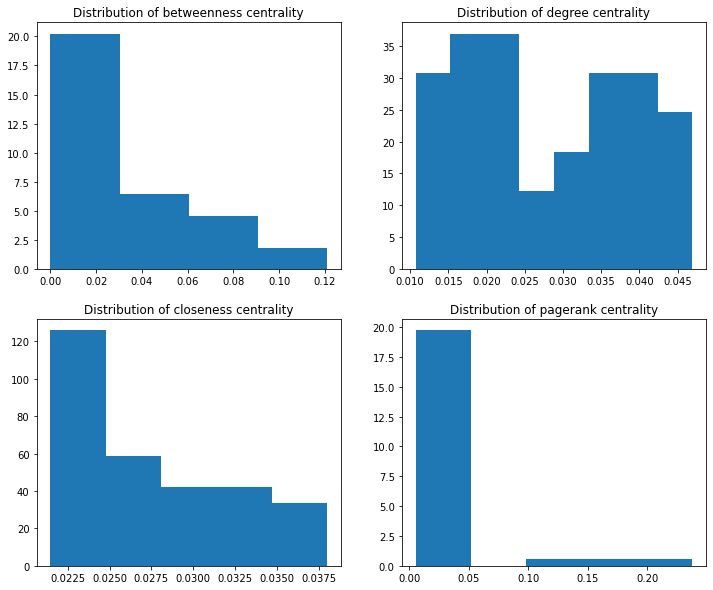

In [81]:
fig, ax = plt.subplots(2,2, figsize = (12,10))

ax[0,0].hist(bet_centr['Centrality'], density = True, bins = 4)
ax[0,0].set_title("Distribution of betweenness centrality")

ax[0,1].hist(deg_centr['Centrality'], density = True, bins = 8)
ax[0,1].set_title("Distribution of degree centrality")

ax[1,0].hist(clo_centr['Centrality'], density = True, bins = 5)
ax[1,0].set_title("Distribution of closeness centrality")

ax[1,1].hist(prk_centr['Centrality'], density = True, bins = 5)
ax[1,1].set_title("Distribution of pagerank centrality")

plt.show()

In [42]:
features = pd.concat([bet_centr, deg_centr, clo_centr, prk_centr], axis = 1)
features.columns =["Betweenness", "Degree", "Closeness", "Pagerank"]
features.T                

,Harry Potter,Ronald Weasley,Hermione Granger,Albus Dumbledore,Minerva McGonagall,Rubeus Hagrid,Lord Voldemort,Fred Weasley,George Weasley,Ginny Weasley,...,Seamus Finnigan,James Potter,Lucius Malfoy,Argus Filch,Molly Weasley,Marcus Flint,Ollivander,Trelawney,Rolanda Hooch,Charlie Weasley
Betweenness,0.120978,0.120978,0.087242,0.072090,0.070885,0.066879,0.061356,0.056488,0.054949,0.039574,...,0.002323,0.002220,0.001550,0.001420,0.001252,0.001178,0.001132,0.000898,0.000432,0.000000
Degree,0.046917,0.046917,0.044236,0.042895,0.041555,0.041555,0.040214,0.038874,0.038874,0.036193,...,0.018767,0.018767,0.017426,0.022788,0.017426,0.014745,0.010724,0.020107,0.013405,0.014745
Closeness,0.038012,0.038012,0.035957,0.035011,0.034113,0.034113,0.033261,0.032449,0.032449,0.030940,...,0.023758,0.023758,0.023341,0.025102,0.023341,0.022550,0.021458,0.024189,0.022174,0.022550
Pagerank,0.237785,0.152615,0.110531,0.050996,0.019697,0.032284,0.026746,0.032554,0.030412,0.023806,...,0.007798,0.009162,0.006179,0.008175,0.006179,0.005347,0.005810,0.008091,0.005497,0.007662


# Regressione logistica per la previsione di lati

In [11]:
import pandas as pd

F  = [[41,'Potter','G'],
      [41,'Weasley','G'],
      [42,'Granger','G'],
      [93,'Hagrid','G'],
      [140,'Dumbledore','G'],
      [42,'Malfoy','S'],
      [140,'McGonall','G'],
      [61,'Snape','S'],
      [40,'Weasley','G'],
      [81,'Dursley','B'],   # B per babbano
      [0,'Dursley','B'], 
      [41,'Dursley','B'],
      [41,'Longbottom','G'],
      [43,'Weasley','G'],
      [43,'Weasley','G'],
      [95,'Voldemort','S'],
      [70,'Filch','NA'],
      [51,'Weasley','G'],
      [0,'Ollivander','R'], #Ravenclaw    # where zero it is NA
      [70,'Sprout','H'],   #Hufflepuff
      [45,'Weasley','G'],
      [49,'Weasley','G'],
      [46,'Wood','G'],
      [41,'Finnigan','G'],
      [41,'Crabbe','S'],
      [41,'Goyle','S'],
      [46,'Flint','S'],
      [61,'Potter','G'] ,
      [61,'Evans','G'],
      [103,'Hooch','NA'],
      [64,'Flitwick','R'],
      [54,'Quirrel','R']]

features = pd.DataFrame(F, index = characters.keys()  ,columns = ['Age','Family','House'])

ValueError: Shape of passed values is (32, 3), indices imply (36, 3)

In [ ]:
features

,age,surname,house
Harry Potter,41,Potter,G
Ronald Weasley,41,Weasley,G
Hermione Granger,42,Granger,G
Rubeus Hagrid,93,Hagrid,G
Albus Dumbledore,140,Dumbledore,G
Draco Malfoy,42,Malfoy,S
Minerva McGonagall,140,McGonall,G
Severus Snape,61,Snape,S
Ginny Weasley,40,Weasley,G
Vernon Dursley,81,Dursley,B


In [ ]:
# costruzione delle edge features

features_age = np.outer(np.array(features['age']),np.array(features['age']))
features_relative = np.zeros(shape = (len(features),len(features)))
features_same_house = np.zeros(shape = (len(features),len(features)))

for i in range(len(features)):

  for j in range(i+1,len(features)):

    features_relative[i,j] = (features['surname'][i] == features['surname'][j] )   # indicatrice se due personaggi sono della stessa famiglia
    features_relative[j,i] = features_relative[i,j]

    features_same_house[i,j] = ((features['house'][i] == features['house'][j]  and features['house'][j] not in ['NA','B'] and features['house'][i] not in ['NA','B']))   
    features_same_house[j,i] = features_same_house[i,j]                            # indicatrice se due personaggi sono della stessa casata

features_age = features_age.flatten()
features_relative = features_relative.flatten()
features_same_house = features_same_house.flatten()



In [ ]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import warnings
warnings.filterwarnings('ignore') 

max_interaction = np.max(sociomatrix)
weights = sociomatrix.flatten()/np.sum(sociomatrix)     # weights for weighting the loss in case it's needed (was causing problems)

y = np.vectorize(lambda x: 1 if x>0 else 0)(sociomatrix.flatten())

n = sociomatrix.shape[0]

degrees = sociomatrix@np.ones(sociomatrix.shape[0])
bet_centr = np.array(list(nx.betweenness_centrality(G).values()))
pagerank_centr = np.array(list(nx.algorithms.link_analysis.pagerank_alg.pagerank(G).values()))
closeness_centr = np.array(list( nx.closeness_centrality(G).values() ))
edge_density = np.mean(sociomatrix)

F = np.vstack((features_age,features_relative,features_same_house)).T


#X = np.zeros((n,n,9))
X = np.zeros((n,n,n))

for feat_index in range(n):   # problem: Y is symmetric

  for i in range(n):

    for j in range(n):

      #X[i,j] = np.array( [degrees[i],degrees[j],bet_centr[i],bet_centr[j],pagerank_centr[i],pagerank_centr[j],
                  #        closeness_centr[i],closeness_centr[j],edge_density
                 #         ] 
                 #       )

      #X[i,j] = np.hstack((sociomatrix[i],sociomatrix[j]))

      X[i,j]= sociomatrix[i]*sociomatrix[j]      # including as regressor the indicator of common neighbors

X = X.reshape( X.shape[0]*X.shape[1],X.shape[2] )

X = np.hstack((X,F))                             # including features


#lr = LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0,0.2,0.5,0.8,1])
lr = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.5,C = 0.001)

lr.fit(X,y)#sample_weight = sociomatrix.flatten() )   # why not working for the weights?

lr.coef_

coefs = pd.DataFrame(lr.coef_.T,index = (list(characters.keys())+['age','surname','house']) )

In [ ]:
coefs

,0
Harry Potter,0.000335
Ronald Weasley,0.000072
Hermione Granger,-0.000003
Rubeus Hagrid,0.000188
Albus Dumbledore,0.000095
Draco Malfoy,0.000000
Minerva McGonagall,0.000125
Severus Snape,0.000299
Ginny Weasley,0.000000
Vernon Dursley,0.000000


In [ ]:
pred_probs = lr.predict_proba(X)[:,1]
pred_probs = np.vectorize(lambda x: 1 if x>0.5 else 0)(pred_probs)

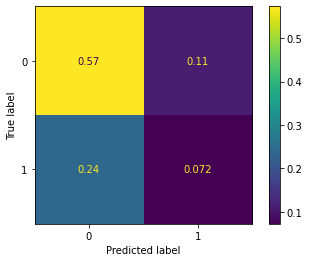

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix(y.flatten(), pred_probs,normalize = 'all'))
disp.plot()
plt.show()

# this model is not able to correctly predict interactions that will happen in future books

# High dimensional exponential model with lasso   (was not useful at all)

We try here the simplest model in which there's one statistic per edge and it's $\psi(Y) = 1$, so it is $P(Y|\theta) \propto \exp(\sum_{i,j}\theta_{ij}Y_{ij})$. This model is high dimensional, so we need variable selection

In [ ]:
lr =   LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.5,C = 10000) #LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0.2,0.5,0.8])
lr.fit(np.identity(y.shape[0]),y,sample_weight = sociomatrix.flatten())

LogisticRegression(C=10000, l1_ratio=0.5, penalty='elasticnet', solver='saga')

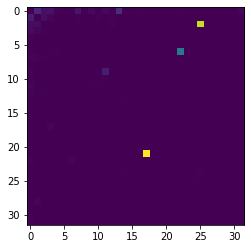

In [ ]:
plt.imshow(lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1])))
plt.show()

In [ ]:
theta = 0.5*(lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1]))+lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1])).T)  #symmetrize the weights matrix
pd.DataFrame( theta , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.000000,0.302236,0.120518,0.129294,0.031032,0.000000,0.021650,0.108205,0.0,0.050583,0.015477,0.058013,0.033086,0.224374,0.002506,0.010841,0.015038,0.001286,0.006936,0.0,0.000000,0.000000,0.024095,0.008453,0.002594,0.005452,0.003656,0.000000,0.000000,0.000000,0.000000,0.046033
Ronald Weasley,0.302236,0.000000,0.112017,0.044752,0.005710,0.000000,0.009345,0.024736,0.0,0.000362,0.013953,0.000254,0.016197,0.000000,0.000000,0.000609,0.000000,0.000000,0.000000,0.0,0.000000,0.002644,0.000000,0.000000,0.000000,0.001893,0.000000,0.000000,0.022293,0.000000,0.000000,0.003128
Hermione Granger,0.120518,0.112017,0.000000,0.021108,0.000000,0.000634,0.000000,0.014325,0.0,0.000000,0.000000,0.000000,0.022771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.472247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rubeus Hagrid,0.129294,0.044752,0.021108,0.000000,0.010241,0.000000,0.009547,0.005315,0.0,0.000000,0.000000,0.000000,0.001359,0.000000,0.000000,0.000105,0.000000,0.021910,0.000093,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albus Dumbledore,0.031032,0.005710,0.000000,0.010241,0.000000,0.000000,0.011067,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001552,0.000000,0.000000,0.000000,0.0,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165,0.000000
Draco Malfoy,0.000000,0.000000,0.000634,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minerva McGonagall,0.021650,0.009345,0.000000,0.009547,0.011067,0.000000,0.000000,0.003999,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.656115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000736,0.000000
Severus Snape,0.108205,0.024736,0.014325,0.005315,0.000000,0.000000,0.003999,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000375,0.002568,0.006567,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002910,0.008373
Ginny Weasley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vernon Dursley,0.050583,0.000362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012231,0.133273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
[(characters_array[i],characters_array[j]) for i in range(32) for j in range(32) if (theta == np.max(theta))[i,j]==1]   # maximum interactions

[('Bill Weasley', 'Charlie Weasley'), ('Charlie Weasley', 'Bill Weasley')]

In [ ]:
def sigmoid(v):
  return np.vectorize(lambda x : 1 / (1 + np.exp(-x)))(v)

In [ ]:
pd.DataFrame( sigmoid(theta) , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.500000,0.574989,0.530093,0.532278,0.507757,0.500000,0.505412,0.527025,0.5,0.512643,0.503869,0.514499,0.508271,0.555859,0.500626,0.502710,0.503759,0.500321,0.501734,0.5,0.500000,0.500000,0.506024,0.502113,0.500648,0.501363,0.500914,0.500000,0.500000,0.500000,0.500000,0.511506
Ronald Weasley,0.574989,0.500000,0.527975,0.511186,0.501428,0.500000,0.502336,0.506184,0.5,0.500090,0.503488,0.500063,0.504049,0.500000,0.500000,0.500152,0.500000,0.500000,0.500000,0.5,0.500000,0.500661,0.500000,0.500000,0.500000,0.500473,0.500000,0.500000,0.505573,0.500000,0.500000,0.500782
Hermione Granger,0.530093,0.527975,0.500000,0.505277,0.500000,0.500159,0.500000,0.503581,0.5,0.500000,0.500000,0.500000,0.505693,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.813399,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Rubeus Hagrid,0.532278,0.511186,0.505277,0.500000,0.502560,0.500000,0.502387,0.501329,0.5,0.500000,0.500000,0.500000,0.500340,0.500000,0.500000,0.500026,0.500000,0.505477,0.500023,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Albus Dumbledore,0.507757,0.501428,0.500000,0.502560,0.500000,0.500000,0.502767,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500388,0.500000,0.500000,0.500000,0.5,0.500042,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500041,0.500000
Draco Malfoy,0.500000,0.500000,0.500159,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Minerva McGonagall,0.505412,0.502336,0.500000,0.502387,0.502767,0.500000,0.500000,0.501000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.658387,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500184,0.500000
Severus Snape,0.527025,0.506184,0.503581,0.501329,0.500000,0.500000,0.501000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500094,0.500642,0.501642,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500728,0.502093
Ginny Weasley,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Vernon Dursley,0.512643,0.500090,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.503058,0.533269,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


# Ergm on nodes

$$
P(Y|\theta) \propto \exp \bigl( \sum_{i,j = 1}^{n}\theta_{i}Y_{ij} \bigr)
$$

In [ ]:
lr =   LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.8,C = 0.2) #LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0.2,0.5,0.8])
X = np.vstack( [ np.array([np.identity(sociomatrix.shape[0])[i]]*sociomatrix.shape[0]) for i in range(sociomatrix.shape[0])] ) #just including a statistic per node
lr.fit(X,y)#,sample_weight = sociomatrix.flatten())

LogisticRegression(C=0.2, l1_ratio=0.8, penalty='elasticnet', solver='saga')

In [ ]:
pd.DataFrame( lr.coef_.T , index = characters.keys())

,0
Harry Potter,1.803490
Ronald Weasley,1.803585
Hermione Granger,0.298118
Rubeus Hagrid,0.876701
Albus Dumbledore,0.298148
Draco Malfoy,0.000000
Minerva McGonagall,0.419200
Severus Snape,0.651784
Ginny Weasley,-0.570628
Vernon Dursley,0.000000


In [ ]:
pd.DataFrame( sigmoid(np.outer(lr.coef_,lr.coef_)) , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.962766,0.962772,0.631266,0.829363,0.631279,0.5,0.680490,0.764135,0.263254,0.5,0.5,0.5,0.631281,0.5,0.5,0.5,0.5,0.5,0.456695,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.392260,0.5,0.5
Ronald Weasley,0.962772,0.962778,0.631273,0.829375,0.631285,0.5,0.680498,0.764146,0.263244,0.5,0.5,0.5,0.631288,0.5,0.5,0.5,0.5,0.5,0.456693,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.392255,0.5,0.5
Hermione Granger,0.631266,0.631273,0.522204,0.564971,0.522206,0.5,0.531202,0.548425,0.457574,0.5,0.5,0.5,0.522207,0.5,0.5,0.5,0.5,0.5,0.492824,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.481915,0.5,0.5
Rubeus Hagrid,0.829363,0.829375,0.564971,0.683219,0.564977,0.5,0.590858,0.639091,0.377477,0.5,0.5,0.5,0.564978,0.5,0.5,0.5,0.5,0.5,0.478908,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.446992,0.5,0.5
Albus Dumbledore,0.631279,0.631285,0.522206,0.564977,0.522208,0.5,0.531205,0.548430,0.457569,0.5,0.5,0.5,0.522209,0.5,0.5,0.5,0.5,0.5,0.492823,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.481913,0.5,0.5
Draco Malfoy,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5
Minerva McGonagall,0.680490,0.680498,0.531202,0.590858,0.531205,0.5,0.543820,0.567885,0.440482,0.5,0.5,0.5,0.531206,0.5,0.5,0.5,0.5,0.5,0.489910,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.474580,0.5,0.5
Severus Snape,0.764135,0.764146,0.548425,0.639091,0.548430,0.5,0.567885,0.604637,0.408076,0.5,0.5,0.5,0.548431,0.5,0.5,0.5,0.5,0.5,0.484315,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.460525,0.5,0.5
Ginny Weasley,0.263254,0.263244,0.457574,0.377477,0.457569,0.5,0.440482,0.408076,0.580692,0.5,0.5,0.5,0.457569,0.5,0.5,0.5,0.5,0.5,0.513733,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.534577,0.5,0.5
Vernon Dursley,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5
